In [5]:
import ROOT as r
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import math
import numpy as np
import colorsys
from scipy import optimize as sciopt
import os

In [42]:
plt.style.use(hep.style.ATLAS)
plt.style.use({"axes.labelsize":'36', 'lines.linewidth':'2', 'lines.markersize':'2', 'font.size':'24'})

In [7]:
run_dfs = dict()
for filename in os.listdir("./data/"):
    if filename.endswith(".csv"):
        print(filename[:-4])
        run_dfs[filename[:-4]] = pd.read_csv("./data/"+filename)

1A 60hour
1B highkick
1C 9day
1D endgame
2C


In [8]:
def plot_predicted(data, name):
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(11,11)
    
    ax.plot(data['run'], data['y_at_30'], linestyle='none', marker='o', color='xkcd:blue', label='30μs', markersize=8);
    ax.errorbar(data['run'], data['y_at_30'], yerr=data['y_at_30_error'], color='xkcd:blue', elinewidth=3, fmt='none');
    
    ax.plot(data['run'], data['y_at_200'], linestyle='none', marker='o', color='xkcd:red', label='200μs', markersize=8);
    ax.errorbar(data['run'], data['y_at_200'], yerr=data['y_at_200_error'], color='xkcd:red', elinewidth=3, fmt='none');
    
    ax.set_xlabel('Dataset')
    ax.set_ylabel('Y Position Calculated from Fit (mm from center)')
    ax.set_title(name);
    
    ax.legend(loc=1, fontsize='x-large', labelspacing=1.5, framealpha=1);
    
    fig.tight_layout();
    plt.savefig(name + '.png')
    plt.close();

In [9]:
def plot_summary(data, time):
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(15,11)
    
    ax.plot(data['caloNum'], data['1A_y'], linestyle='-', color='xkcd:blue', label='run 1A - 60hour');
    ax.errorbar(data['caloNum'], data['1A_y'], yerr=data['1A_yerr'], color='xkcd:blue', elinewidth=2, fmt='none');
    
    ax.plot(data['caloNum'], data['1B_y'], linestyle='-', color='xkcd:red', label='run 1B - highkick');
    ax.errorbar(data['caloNum'], data['1B_y'], yerr=data['1B_yerr'], color='xkcd:red', elinewidth=2, fmt='none');
    
    ax.plot(data['caloNum'], data['1C_y'], linestyle='-', color='xkcd:green', label='run 1C - 9day');
    ax.errorbar(data['caloNum'], data['1C_y'], yerr=data['1C_yerr'], color='xkcd:green', elinewidth=2, fmt='none');
    
    ax.plot(data['caloNum'], data['1D_y'], linestyle='-', color='xkcd:orange', label='run 1D - endgame');
    ax.errorbar(data['caloNum'], data['1D_y'], yerr=data['1D_yerr'], color='xkcd:orange', elinewidth=2, fmt='none');
    
    ax.plot(data['caloNum'], data['2C_y'], linestyle='-', color='xkcd:dark grey', label='run 2C');
    ax.errorbar(data['caloNum'], data['2C_y'], yerr=data['2C_yerr'], color='xkcd:dark grey', elinewidth=2, fmt='none');
    
    ax.set_xlabel('Calorimeter Number')
    ax.set_ylabel('Y Position Calculated from Fit (mm from center)')
    ax.set_title('Average hit position at ' + str(time) + ' μs vs. calo number');
    
    ax.set_ylim(-0.15, 0.4)
    
    ax.legend(loc=1, fontsize='x-large', labelspacing=1.5, framealpha=1);
    
    fig.tight_layout();
    plt.savefig('summary_'+ str(time)+'.png')
    plt.close();

In [12]:
print(run_dfs.keys())

dict_keys(['1A 60hour', '1B highkick', '1C 9day', '1D endgame', '2C'])


No handles with labels found to put in legend.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


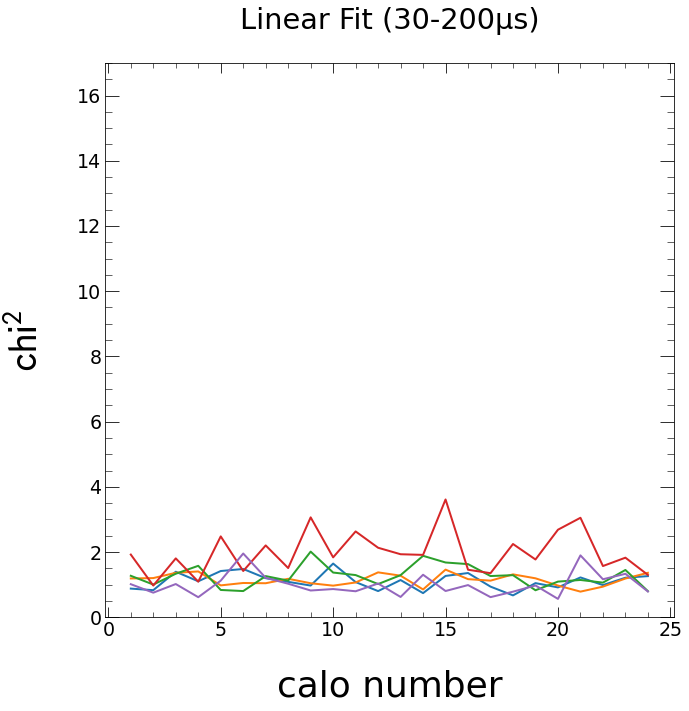

In [54]:
"""
slopes = pd.DataFrame(columns = ['1a', '1b', '1c', '1d', '2c','1a_err', '1b_err', '1c_err', '1d_err', '2c_err', 'caloNum'])

slopes['caloNum'] = run_dfs['2C']['caloNum']

slopes['1a'] = run_dfs['1A 60hour']['a']
slopes['1a_err'] = run_dfs['1A 60hour']['a error']

slopes['1b'] = run_dfs['1B highkick']['a']
slopes['1b_err'] = run_dfs['1B highkick']['a error']

slopes['1c'] = run_dfs['1C 9day']['a']
slopes['1c_err'] = run_dfs['1C 9day']['a error']

slopes['1d'] = run_dfs['1D endgame']['a']
slopes['1d_err'] = run_dfs['1D endgame']['a error']

slopes['2c'] = run_dfs['2C']['a']
slopes['2c_err'] = run_dfs['2C']['a error']
       
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

ax.errorbar(slopes['caloNum'], slopes['1a'], yerr=slopes['1a_err'], label='60hour')
ax.errorbar(slopes['caloNum'], slopes['1b'], yerr=slopes['1b_err'], label='highkick')
ax.errorbar(slopes['caloNum'], slopes['1c'], yerr=slopes['1c_err'], label='9day')
ax.errorbar(slopes['caloNum'], slopes['1d'], yerr=slopes['1d_err'], label='endgame')
ax.errorbar(slopes['caloNum'], slopes['2c'], yerr=slopes['2c_err'], label='run2C')
"""

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

chisqr = pd.DataFrame(columns = ['1a', '1b', '1c', '1d', '2c', 'caloNum'])
chisqr['1a'] = run_dfs['1A 60hour']['chi2']
chisqr['1b'] = run_dfs['1B highkick']['chi2']
chisqr['1c'] = run_dfs['1C 9day']['chi2']
chisqr['1d'] = run_dfs['1D endgame']['chi2']
chisqr['2c'] = run_dfs['2C']['chi2']
chisqr['caloNum'] = run_dfs['2C']['caloNum']

ax.plot(chisqr['caloNum'], chisqr['1a'])
ax.plot(chisqr['caloNum'], chisqr['1b'])
ax.plot(chisqr['caloNum'], chisqr['1c'])
ax.plot(chisqr['caloNum'], chisqr['1d'])
ax.plot(chisqr['caloNum'], chisqr['2c'])


#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        
ax.set_ylabel(r'$chi^{2}$', fontsize=40)
ax.set_xlabel('calo number')
ax.set_title('Linear Fit (30-200μs)', y=1.05)
ax.set_ylim(0, 17)
ax.legend(loc=0, fontsize='x-small', labelspacing=1.5, framealpha=1);

#plt.savefig('../earlyPosition/linear_m.png', bbox_inches='tight');

In [29]:
print(slopes)

          1a        1b        1c        1d        2c    1a_err    1b_err  \
0  -0.000720 -0.000298 -0.000405 -0.001088  0.000167  0.000096  0.000103   
1  -0.000667 -0.000265 -0.000294 -0.000971  0.000381  0.000111  0.000124   
2  -0.000499 -0.000281 -0.000310 -0.001015 -0.000046  0.000124  0.000114   
3  -0.000802 -0.000337 -0.000378 -0.001167  0.000423  0.000111  0.000117   
4  -0.000766 -0.000620 -0.000458 -0.001310  0.000581  0.000129  0.000100   
5  -0.000593 -0.000635 -0.000444 -0.001376 -0.000188  0.000130  0.000102   
6  -0.000621 -0.000630 -0.000542 -0.001403  0.000056  0.000117  0.000101   
7  -0.000652 -0.000388 -0.000572 -0.001457  0.000008  0.000110  0.000106   
8  -0.000657 -0.000701 -0.000756 -0.001278  0.000003  0.000110  0.000107   
9  -0.000885 -0.000783 -0.000812 -0.001501 -0.000207  0.000134  0.000095   
10 -0.000716 -0.000743 -0.000843 -0.001564 -0.000136  0.000107  0.000099   
11 -0.000850 -0.001017 -0.000734 -0.001469 -0.000424  0.000091  0.000111   
12 -0.000592

In [13]:
run_names = {'60h':      '1A',
             'highKick': '1B',
             '9day':     '1C',
             'endgame':  '1D',
             'run2C':    '2C'}

stuff_200 = pd.DataFrame(columns = ['caloNum',
                                    '1A_y', '1A_yerr',
                                    '1B_y', '1B_yerr',
                                    '1C_y', '1C_yerr',
                                    '1D_y', '1D_yerr',
                                    '2C_y', '2C_yerr'])

stuff_30 = pd.DataFrame(columns = ['caloNum',
                                   '1A_y', '1A_yerr',
                                   '1B_y', '1B_yerr',
                                   '1C_y', '1C_yerr',
                                   '1D_y', '1D_yerr',
                                   '2C_y', '2C_yerr'])

stuff_diff = pd.DataFrame(columns = ['caloNum',
                                     '1A_y', '1A_yerr',
                                     '1B_y', '1B_yerr',
                                     '1C_y', '1C_yerr',
                                     '1D_y', '1D_yerr',
                                     '2C_y', '2C_yerr'])

for caloNum in range(0, 24):
    this_calo = pd.DataFrame(columns = ['run', 'y_at_30', 'y_at_200', 'y_at_30_error', 'y_at_200_error'])
    
    for i, name in enumerate(run_dfs):
        df = run_dfs[name].loc[caloNum]
        
        y_at_30 = df['a'] * 30 + df['b']
        y_at_30_error = np.sqrt( (df['a error'] * 30) ** 2 + (df['b error'] ** 2))
        
        y_at_200 = df['a'] * 200 + df['b']
        y_at_200_error = np.sqrt( (df['a error'] * 200) ** 2 + (df['b error'] ** 2))
        
        run_name = name[0:2]
        
        this_calo.loc[i] = {'run':run_name,
                            'y_at_30':y_at_30,
                            'y_at_200':y_at_200,
                            'y_at_30_error':y_at_30_error,
                            'y_at_200_error':y_at_200_error}
        
    if (caloNum < 9):
        plot_name = 'calo_0' + str(caloNum + 1)
    else:
        plot_name = 'calo_' + str(caloNum + 1)
        
    plot_predicted(this_calo, plot_name)
    
    print(this_calo)
    stuff_200.loc[caloNum] = {'caloNum':  caloNum+1,
                              '1A_y':    this_calo.at[0, 'y_at_200'],
                              '1A_yerr': this_calo.at[0, 'y_at_200_error'],
                              '1B_y':    this_calo.at[1, 'y_at_200'],
                              '1B_yerr': this_calo.at[1, 'y_at_200_error'],
                              '1C_y':    this_calo.at[2, 'y_at_200'],
                              '1C_yerr': this_calo.at[2, 'y_at_200_error'],
                              '1D_y':    this_calo.at[3, 'y_at_200'],
                              '1D_yerr': this_calo.at[3, 'y_at_200_error'],
                              '2C_y':    this_calo.at[4, 'y_at_200'],
                              '2C_yerr': this_calo.at[4, 'y_at_200_error']}
    
    stuff_30.loc[caloNum] = {'caloNum':  caloNum+1,
                             '1A_y':    this_calo.at[0, 'y_at_30'],
                             '1A_yerr': this_calo.at[0, 'y_at_30_error'],
                             '1B_y':    this_calo.at[1, 'y_at_30'],
                             '1B_yerr': this_calo.at[1, 'y_at_30_error'],
                             '1C_y':    this_calo.at[2, 'y_at_30'],
                             '1C_yerr': this_calo.at[2, 'y_at_30_error'],
                             '1D_y':    this_calo.at[3, 'y_at_30'],
                             '1D_yerr': this_calo.at[3, 'y_at_30_error'],
                             '2C_y':    this_calo.at[4, 'y_at_30'],
                             '2C_yerr': this_calo.at[4, 'y_at_30_error']}
    
    stuff_diff.loc[caloNum] = {'caloNum':  caloNum+1,
                               '1A_y':    this_calo.at[0, 'y_at_30'] - this_calo.at[0, 'y_at_200'],
                               '1A_yerr': np.sqrt(this_calo.at[0, 'y_at_30_error'] **2 +  this_calo.at[0, 'y_at_200_error'] **2),
                               '1B_y':    this_calo.at[1, 'y_at_30'] - this_calo.at[1, 'y_at_200'],
                               '1B_yerr': np.sqrt(this_calo.at[1, 'y_at_30_error'] **2 + this_calo.at[1, 'y_at_200_error'] **2),
                               '1C_y':    this_calo.at[2, 'y_at_30'] - this_calo.at[2, 'y_at_200'],
                               '1C_yerr': np.sqrt(this_calo.at[2, 'y_at_30_error'] **2 + this_calo.at[2, 'y_at_200_error'] **2),
                               '1D_y':    this_calo.at[3, 'y_at_30'] - this_calo.at[3, 'y_at_200'],
                               '1D_yerr': np.sqrt(this_calo.at[3, 'y_at_30_error'] **2 + this_calo.at[3, 'y_at_200_error'] **2),
                               '2C_y':    this_calo.at[4, 'y_at_30'] - this_calo.at[4, 'y_at_200'],
                               '2C_yerr': np.sqrt(this_calo.at[4, 'y_at_30_error'] **2 + this_calo.at[4, 'y_at_200_error'] **2)}

plot_summary(stuff_200, 200)
plot_summary(stuff_30, 30)
plot_summary(stuff_diff, "30-200")

  run   y_at_30  y_at_200  y_at_30_error  y_at_200_error
0  1A  0.384128  0.261776       0.009347        0.021084
1  1B  0.221950  0.171230       0.010124        0.022831
2  1C  0.556846  0.488026       0.007675        0.017308
3  1D  0.995273  0.810354       0.004733        0.010642
4  2C -0.134950 -0.106588       0.016746        0.037659
  run   y_at_30  y_at_200  y_at_30_error  y_at_200_error
0  1A -0.115460 -0.228844       0.010879        0.024533
1  1B -0.276359 -0.321424       0.012176        0.027454
2  1C  0.055940  0.006031       0.008166        0.018416
3  1D  0.659992  0.494878       0.003490        0.007849
4  2C -0.292811 -0.227960       0.013852        0.031145
  run   y_at_30  y_at_200  y_at_30_error  y_at_200_error
0  1A  1.258212  1.173321       0.012099        0.027283
1  1B  1.080428  1.032607       0.011126        0.025090
2  1C  1.449676  1.396957       0.008086        0.018234
3  1D  1.939004  1.766474       0.004743        0.010665
4  2C  0.916559  0.908792      